In [1]:
import gdown
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# The file ID is the part after 'd/' and before '/view' in the URL
file_id = '1ECKyZJrO_w2C1jyC_Zdu04ua_ObgkjPk'
destination = './train.csv'  # Specify the path where you want to save the downloaded file
# Construct the download URL
download_url = f'https://drive.google.com/uc?id={file_id}'
# Download the file
gdown.download(download_url, destination, quiet=False)

# The file ID is the part after 'd/' and before '/view' in the URL
file_id = '1BJx7MOHKvPJKgw48oku926DOTAjUY6dF'
destination = './test.csv'  # Specify the path where you want to save the downloaded file
# Construct the download URL
download_url = f'https://drive.google.com/uc?id={file_id}'
# Download the file
gdown.download(download_url, destination, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1ECKyZJrO_w2C1jyC_Zdu04ua_ObgkjPk
From (redirected): https://drive.google.com/uc?id=1ECKyZJrO_w2C1jyC_Zdu04ua_ObgkjPk&confirm=t&uuid=d61b3661-642a-47ee-aa71-0613dd8d1cbd
To: /content/train.csv
100%|██████████| 238M/238M [00:05<00:00, 42.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BJx7MOHKvPJKgw48oku926DOTAjUY6dF
To: /content/test.csv
100%|██████████| 59.8M/59.8M [00:01<00:00, 36.2MB/s]


'./test.csv'

In [25]:
file_id = '1z2kzc5W_LMz5ubrRzvvQh1rCV2cyBf-B'
destination = './imgs.rar'  # Specify the path where you want to save the downloaded file

# Construct the download URL
download_url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
gdown.download(download_url, destination, quiet=False)
!unrar x ./imgs.rar


Downloading...
From (original): https://drive.google.com/uc?id=1z2kzc5W_LMz5ubrRzvvQh1rCV2cyBf-B
From (redirected): https://drive.google.com/uc?id=1z2kzc5W_LMz5ubrRzvvQh1rCV2cyBf-B&confirm=t&uuid=1b3ca104-4dcb-45ec-99aa-3dfcea7fea95
To: /content/imgs.rar
100%|██████████| 20.7M/20.7M [00:00<00:00, 24.3MB/s]


Streaming output truncated to the last 5000 lines.
Extracting  imgs/face_data_24_24_old/trainset/non-faces/B5_00192.png      86%  OK 
Extracting  imgs/face_data_24_24_old/trainset/non-faces/B5_00193.png      86%  OK 
Extracting  imgs/face_data_24_24_old/trainset/non-faces/B5_00194.png      86%  OK 
Extracting  imgs/face_data_24_24_old/trainset/non-faces/B5_00195.png      86%  OK 
Extracting  imgs/face_data_24_24_old/trainset/non-faces/B5_00196.png      86%  OK 
Extracting  imgs/face_data_24_24_old/trainset/non-faces/B5_00197.png      86%  OK 
Extracting  imgs/face_data_24_24_old/trainset/non-faces/B5_00198.png      86%  OK 
Extracting  imgs/face_data_24_24_old/trainset/non-faces/B5_00199.png      86%  OK 
Extracting  imgs/face_data_24_24_old/trainset/non-faces/B5_00200.png      86%  OK 
Extracting  imgs/face_data_24_24_old/trainset/non-faces/B5_00201.png      86%  OK 
Extracting  imgs/face_data_24

In [44]:
import pandas as pd
import numpy as np
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

# Paths to the CSV files
train_path = './train.csv'
test_path = './test.csv'
# lookid_path = './IdLookupTable.csv'

# Read the CSV files
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
# lookid_data = pd.read_csv(lookid_path)

# Columns for Y_train
y_columns = [
    'nose_tip_x', 'nose_tip_y',
    'mouth_left_corner_x', 'mouth_left_corner_y',
    'mouth_right_corner_x', 'mouth_right_corner_y',
    'mouth_center_top_lip_x', 'mouth_center_top_lip_y',
    'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y'
]

# Select the Image column for X_train
X_train = train_data['Image']

# Select the specified columns for Y_train
Y_train = train_data[y_columns]

# Concatenate X_train and Y_train to find rows with missing values
combined_data = pd.concat([X_train, Y_train], axis=1)

# Find rows with any missing values
missing_data = combined_data[combined_data.isnull().any(axis=1)]
non_missing_data = combined_data.dropna()

# Split the combined data back into X_train and Y_train
X_train_non_missing = non_missing_data['Image']
Y_train_non_missing = non_missing_data[y_columns]

# Convert X_train to numpy array and reshape
X_train_non_missing = np.array([np.fromstring(image, sep=' ').reshape(96, 96, 1) for image in X_train_non_missing])
X_train_non_missing = X_train_non_missing.astype('float32') / 255.0  # Normalize pixel values

# Convert Y_train to numpy array
Y_train_non_missing = np.array(Y_train_non_missing)

# Mediapipe setup
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)

# Function to detect face landmarks
def detect_face_landmarks(image):
    results = face_mesh.process(image)
    if results.multi_face_landmarks:
        landmarks = results.multi_face_landmarks[0].landmark
        return landmarks
    return None

# Process images with missing data
for idx, row in missing_data.iterrows():
    image = np.fromstring(row['Image'], sep=' ').reshape(96, 96)
    image_rgb = cv2.cvtColor(image.astype('uint8'), cv2.COLOR_GRAY2RGB)

    landmarks = detect_face_landmarks(image_rgb)
    if landmarks:
        # Example to fill nose_tip_x and nose_tip_y
        row['nose_tip_x'] = landmarks[1].x * 96
        row['nose_tip_y'] = landmarks[1].y * 96

        # Add more points as needed
        combined_data.loc[idx] = row

# Drop rows still having any missing values
combined_data = combined_data.dropna()

# Split the combined data back into X_train and Y_train
X_train = combined_data['Image']
Y_train = combined_data[y_columns]

# Convert X_train to numpy array and reshape
X_train = np.array([np.fromstring(image, sep=' ').reshape(96, 96, 1) for image in X_train])
X_train = X_train.astype('float32') / 255.0  # Normalize pixel values

# Convert Y_train to numpy array
Y_train = np.array(Y_train)

print(len(Y_train))

# Show one of the images with landmarks
def show_image_with_landmarks(image, landmarks):
    plt.imshow(image, cmap='gray')
    for landmark in landmarks:
        plt.scatter(landmark.x * image.shape[1], landmark.y * image.shape[0], s=10, c='red')
    plt.show()

# Display an example
example_idx = missing_data.index[0]
example_image = np.fromstring(missing_data.loc[example_idx, 'Image'], sep=' ').reshape(96, 96)
example_image_rgb = cv2.cvtColor(example_image.astype('uint8'), cv2.COLOR_GRAY2RGB)

example_landmarks = detect_face_landmarks(example_image_rgb)
if example_landmarks:
    show_image_with_landmarks(example_image, example_landmarks)



7049


In [21]:

# Paths to the CSV files
train_path = './train.csv'
test_path = './test.csv'
# lookid_path = './IdLookupTable.csv'

# Read the CSV files
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
# lookid_data = pd.read_csv(lookid_path)

# Columns for Y_train
y_columns = [
    'nose_tip_x', 'nose_tip_y',
    'mouth_left_corner_x', 'mouth_left_corner_y',
    'mouth_right_corner_x', 'mouth_right_corner_y',
    'mouth_center_top_lip_x', 'mouth_center_top_lip_y',
    'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y'
]

# Select the Image column for X_train
X_train = train_data['Image']

# Select the specified columns for Y_train
Y_train = train_data[y_columns]

# Concatenate X_train and Y_train to discard rows with missing values
combined_data = pd.concat([X_train, Y_train], axis=1)

# Drop rows with any missing values
combined_data = combined_data.dropna()

# Split the combined data back into X_train and Y_train
X_train = combined_data['Image']
Y_train = combined_data[y_columns]

# Convert X_train to numpy array and reshape
X_train = np.array([np.fromstring(image, sep=' ').reshape(96, 96, 1) for image in X_train])
X_train = X_train.astype('float32') / 255.0  # Normalize pixel values

# Convert Y_train to numpy array
Y_train = np.array(Y_train)

# Define the model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(96, 96, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(30, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2))

# Compile the model
model.compile(optimizer='adam', loss='mse')


# Save the model
# model.save('path/to/your/model')


In [42]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mediapipe as mp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the keypoints to extract
keypoint_indices = [4, 61, 291, 0, 17]  # Indices of the keypoints to extract

# Initialize MediaPipe Face Detection
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

# Function to extract keypoints from an image
def extract_keypoints(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(image_rgb)
    if results.multi_face_landmarks:
        landmarks = results.multi_face_landmarks[0].landmark
        keypoints = np.array([(lm.x, lm.y) for lm in landmarks])
        return keypoints * np.array([image.shape[1], image.shape[0]])[::-1]  # Convert normalized coordinates to pixels
    else:
        return None

# Paths to image directories
train_dir = './imgs/face_data_24_24/trainset/faces'
test_dir = './imgs/face_data_24_24/testset/faces'

# Function to process images in a directory
def process_images_from_dir(directory):
    images = []
    keypoints_list = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(directory, filename)
            image = cv2.imread(image_path)
            if image is not None:
                keypoints = extract_keypoints(image)
                if keypoints is not None:
                    images.append(image)
                    keypoints_list.append(keypoints[keypoint_indices])  # Extract required keypoints
    return images, keypoints_list


# Process images from train and test directories
train_images, train_keypoints = process_images_from_dir(train_dir)
test_images, test_keypoints = process_images_from_dir(test_dir)

# Convert images to numpy arrays and reshape for model input
train_images = np.array(train_images).reshape(-1, 96, 96, 1)
test_images = np.array(test_images).reshape(-1, 96, 96, 1)

# Convert keypoints lists to numpy arrays
train_keypoints = np.array(train_keypoints)
test_keypoints = np.array(test_keypoints)


# Display some sample images with keypoints
# num_samples = 5
# sample_indices = np.random.randint(0, len(train_images), num_samples)

# for idx in sample_indices:
#     plt.figure()
#     plt.imshow(cv2.cvtColor(train_images[idx], cv2.COLOR_BGR2RGB))
#     plt.scatter(train_keypoints[idx][:, 0], train_keypoints[idx][:, 1], c='r', s=10)
#     plt.axis('off')
#     plt.show()

# Paths to the CSV files
train_path = './train.csv'
test_path = './test.csv'

# Read the CSV files
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Columns for Y_train
y_columns = [
    'nose_tip_x', 'nose_tip_y',
    'mouth_left_corner_x', 'mouth_left_corner_y',
    'mouth_right_corner_x', 'mouth_right_corner_y',
    'mouth_center_top_lip_x', 'mouth_center_top_lip_y',
    'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y'
]

# Select the Image column for X_train
X_train_paths = train_data['Image']

# Initialize lists to store X_train and Y_train
X_train_images = []
Y_train_keypoints = []

# Process each image path and corresponding keypoints
for image_path, keypoints in zip(X_train_paths, train_keypoints):
    image = cv2.imread(os.path.join(train_dir, image_path))
    if image is not None:
        X_train_images.append(image)
        Y_train_keypoints.append(keypoints)

# Convert lists to numpy arrays
X_train_images = np.array(X_train_images)
Y_train_keypoints = np.array(Y_train_keypoints)

# Normalize pixel values
X_train_images = X_train_images.astype('float32') / 255.0

# Reshape X_train_images to match the expected input shape for the model
X_train_images = np.array([np.fromstring(image, sep=' ').reshape(96, 96, 1) for image in X_train_images])
X_train_images = X_train_images.astype('float32') / 255.0  # Normalize pixel values
 # Define the model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(96, 96, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(30, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10))  # Adjusted to 10 for the selected keypoints

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Append keypoints data to the existing training data
X_train_combined = np.concatenate((X_train_images, X_train), axis=0)
Y_train_combined = np.concatenate((Y_train_keypoints, Y_train), axis=0)

# Train the model
history = model.fit(X_train_combined, Y_train_combined, epochs=50, batch_size=32, validation_split=0.2)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 4 dimension(s)

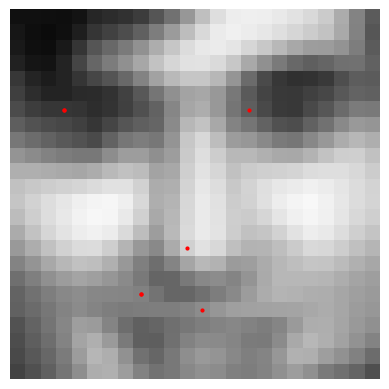

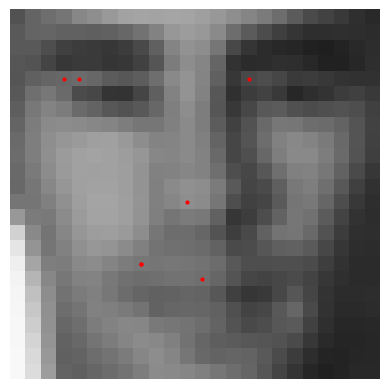

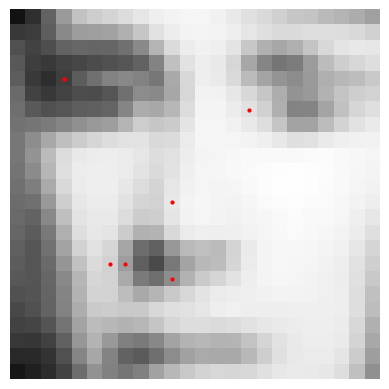

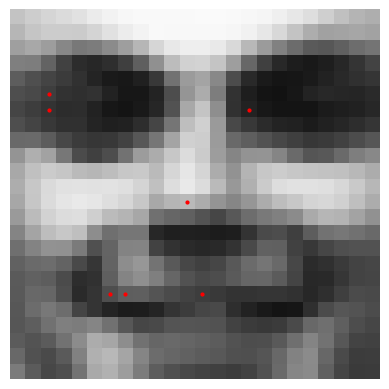

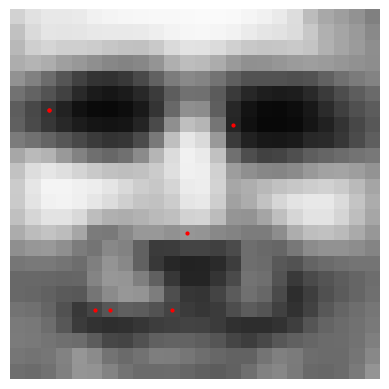

In [36]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

# Define the keypoints to extract
keypoint_indices = [4, 61, 291, 0, 17]  # Indices of the keypoints to extract

# Initialize MediaPipe Face Detection
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

# Function to extract keypoints from an image
def extract_keypoints(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(image_rgb)
    if results.multi_face_landmarks:
        landmarks = results.multi_face_landmarks[0].landmark
        keypoints = np.array([(lm.x, lm.y) for lm in landmarks])
        return keypoints * np.array([image.shape[1], image.shape[0]])[::-1]  # Convert normalized coordinates to pixels
    else:
        return None

# Function to plot image with keypoints
def plot_image_with_keypoints(image, keypoints):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    for idx, (x, y) in enumerate(keypoints.astype(int)):
        if idx < len(keypoint_indices):
            plt.plot(x, y, 'ro', markersize=2)
    plt.axis('off')
    plt.show()

# Paths to image directories
train_dir = './imgs/face_data_24_24/trainset/faces'
test_dir = './imgs/face_data_24_24/testset/faces'

# Function to process images in a directory
def process_images_from_dir(directory):
    images = []
    keypoints_list = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(directory, filename)
            image = cv2.imread(image_path)
            if image is not None:
                keypoints = extract_keypoints(image)
                if keypoints is not None:
                    images.append(image)
                    keypoints_list.append(keypoints[keypoint_indices])  # Extract required keypoints
    return images, keypoints_list

# Process images from train and test directories
train_images, train_keypoints = process_images_from_dir(train_dir)
test_images, test_keypoints = process_images_from_dir(test_dir)

# Display some sample images with keypoints
num_samples = 5
sample_indices = np.random.randint(0, len(train_images), num_samples)

for idx in sample_indices:
    plot_image_with_keypoints(train_images[idx], train_keypoints[idx])


In [22]:
# Train the model
# history = model.fit(X_train, Y_train, epochs=300, batch_size=32, validation_split=0.2)


Epoch 1/300
177/177 [==============================] - 6s 18ms/step - loss: 266.9953 - val_loss: 84.2130
Epoch 2/300
177/177 [==============================] - 2s 14ms/step - loss: 39.4511 - val_loss: 70.4931
Epoch 3/300
177/177 [==============================] - 3s 14ms/step - loss: 38.9293 - val_loss: 113.0500
Epoch 4/300
177/177 [==============================] - 3s 16ms/step - loss: 36.1798 - val_loss: 114.6298
Epoch 5/300
177/177 [==============================] - 3s 17ms/step - loss: 34.7572 - val_loss: 86.7632
Epoch 6/300
177/177 [==============================] - 2s 14ms/step - loss: 33.5883 - val_loss: 138.5745
Epoch 7/300
177/177 [==============================] - 2s 13ms/step - loss: 33.4604 - val_loss: 44.2718
Epoch 8/300
177/177 [==============================] - 2s 14ms/step - loss: 34.6119 - val_loss: 150.2489
Epoch 9/300
177/177 [==============================] - 3s 14ms/step - loss: 36.3352 - val_loss: 65.5599
Epoch 10/300
177/177 [==============================] - 3s 

56/56 [==============================] - 0s 3ms/step


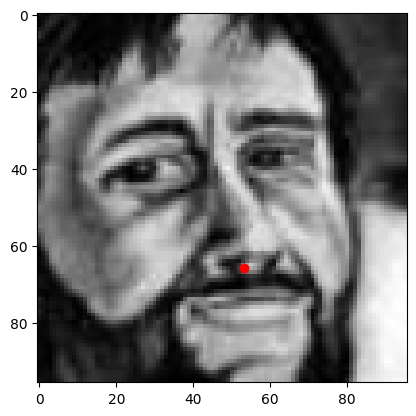

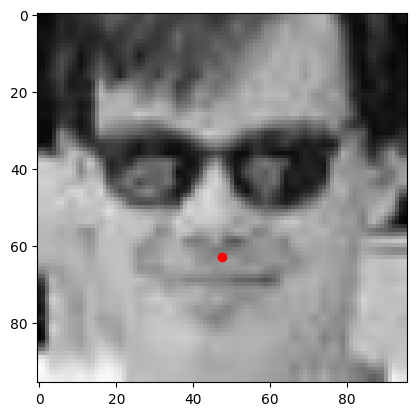

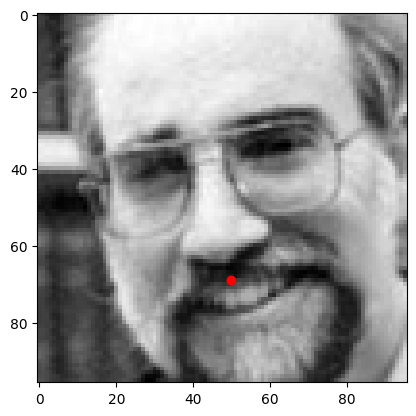

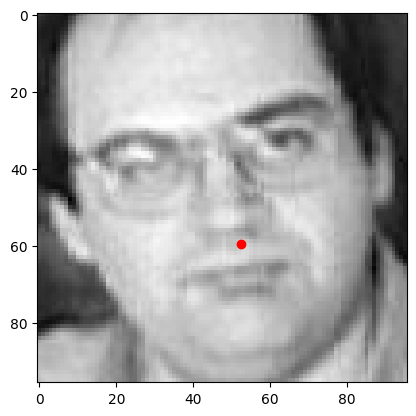

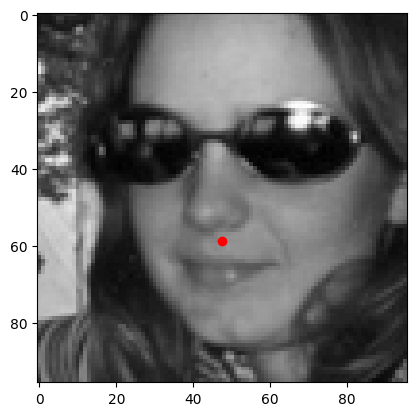

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Process test data
test_images = np.array([np.fromstring(image, sep=' ').reshape(96, 96, 1) for image in test_data['Image']])
test_images = test_images.astype('float32') / 255.0

# Predict key points on test data
predicted_points = model.predict(test_images)

# Function to plot image with key points
def plot_image_with_keypoints(image, keypoints):
    plt.imshow(image, cmap='gray')
    keypoints = keypoints.reshape(-1, 2)
    for (x, y) in keypoints:
        plt.plot(x, y, 'ro')
    plt.show()

# Plot some random test images with predicted key points
num_images_to_show = 5
random_indices = random.sample(range(len(test_images)), num_images_to_show)

for i in random_indices:
    plot_image_with_keypoints(test_images[i].reshape(96, 96), predicted_points[i])


In [16]:
mode_name = '/model'
# Save the model in TensorFlow SavedModel format
model.save(mode_name)
from google.colab import files
import shutil

# Compress the saved model directory
shutil.make_archive(mode_name, 'zip', mode_name)

# Download the zipped model
files.download(mode_name+'.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 17ms/step


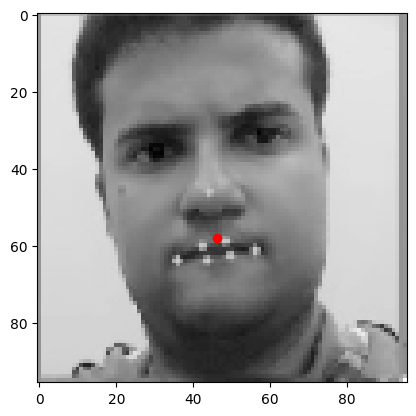

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define a function to preprocess the image
def preprocess_image(image_path):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image to 96x96
    image = cv2.resize(image, (96, 96))
    # Normalize the image
    image = image.astype('float32') / 255.0
    # Reshape the image to match the input shape of the model
    image = np.reshape(image, (1, 96, 96, 1))
    return image

# Define a function to plot the image with keypoints
def plot_image_with_keypoints(image_path, keypoints):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image to 96x96
    image = cv2.resize(image, (96, 96))

    plt.imshow(image, cmap='gray')
    keypoints = keypoints.reshape(-1, 2)
    for (x, y) in keypoints:
        plt.plot(x, y, 'ro')
    plt.show()

# Preprocess the image
image_path = 'Untitled.png'
preprocessed_image = preprocess_image(image_path)

# Predict the keypoints
predicted_points = model.predict(preprocessed_image)

# Plot the image with the predicted keypoints
plot_image_with_keypoints(image_path, predicted_points[0])
